<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 2
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Тема 10. Бустинг
## <center>Часть 5. Оценка важности признаков с Xgboost

## Загрузка бибилиотек

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(font_scale=1.5)
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Загрузка и подготовка данных

Посмотрим на примере данных по оттоку клиентов из телеком-компании.### Load data<a name='data' />

In [2]:
# df = pd.read_csv("../../data/telecom_churn.csv")
df = pd.read_csv('https://github.com/Yorko/mlcourse.ai/raw/main/data/telecom_churn.csv')

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**Штаты просто занумеруем, а признаки International plan (наличие международного роуминга), Voice mail plan (наличие голосовой почтыы) и целевой Churn сделаем бинарными.**

In [4]:
state_enc = LabelEncoder()
df["State"] = state_enc.fit_transform(df["State"])
df["International plan"] = (df["International plan"] == "Yes").astype("int")
df["Voice mail plan"] = (df["Voice mail plan"] == "Yes").astype("int")
df["Churn"] = (df["Churn"]).astype("int")

**Разделим данные на обучающую и тестовую выборки в отношении 7:3. Инициализируем соотв. объекты DMatrix dtrain и dtest.**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("Churn", axis=1),
    df["Churn"],
    test_size=0.3,
    stratify=df["Churn"],
    random_state=17,
)
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

### Обучение модели

**Обучим всего 50 деревьев решений глубины 3.**

In [6]:
params = {"objective": "binary:logistic", "max_depth": 3, "silent": 1, "eta": 0.5}

num_rounds = 50

In [7]:
watchlist = [(dtest, "test"), (dtrain, "train")]  # native interface only
xgb_model = xgb.train(params, dtrain, num_rounds, watchlist)

[0]	test-logloss:0.33290	train-logloss:0.30241


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [21:23:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	test-logloss:0.28671	train-logloss:0.24645
[2]	test-logloss:0.27112	train-logloss:0.22190
[3]	test-logloss:0.24141	train-logloss:0.18973
[4]	test-logloss:0.23351	train-logloss:0.17966
[5]	test-logloss:0.22315	train-logloss:0.16866
[6]	test-logloss:0.21930	train-logloss:0.16210
[7]	test-logloss:0.21877	train-logloss:0.15774
[8]	test-logloss:0.21713	train-logloss:0.14960
[9]	test-logloss:0.21001	train-logloss:0.14440
[10]	test-logloss:0.20772	train-logloss:0.14155
[11]	test-logloss:0.20773	train-logloss:0.13702
[12]	test-logloss:0.20861	train-logloss:0.13363
[13]	test-logloss:0.20758	train-logloss:0.12949
[14]	test-logloss:0.20255	train-logloss:0.12568
[15]	test-logloss:0.20154	train-logloss:0.12482
[16]	test-logloss:0.20490	train-logloss:0.12197
[17]	test-logloss:0.20578	train-logloss:0.12107
[18]	test-logloss:0.20725	train-logloss:0.11853
[19]	test-logloss:0.20522	train-logloss:0.11635
[20]	test-logloss:0.20601	train-logloss:0.11500
[21]	test-logloss:0.20287	train-logloss:0.11043
[

### Важность признаков

**F score при оценке важности признаков в Xgboost (не путать с F1 score как метрики качества классификации) вычисляется на основе того, как часто разбиение делалось по данному признаку.**

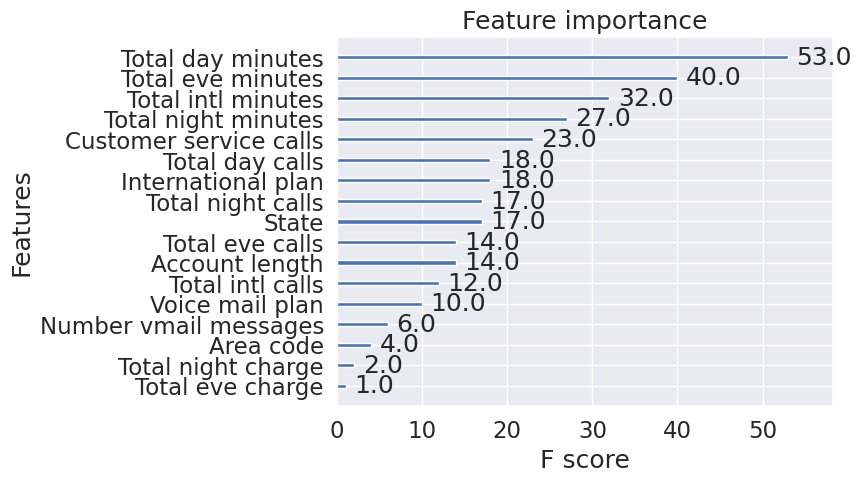

In [8]:
xgb.plot_importance(xgb_model);

**Можно так, в виде словаря или DataFrame:**

In [9]:
importances = xgb_model.get_fscore()
importances

{'State': 17.0,
 'Account length': 14.0,
 'Area code': 4.0,
 'International plan': 18.0,
 'Voice mail plan': 10.0,
 'Number vmail messages': 6.0,
 'Total day minutes': 53.0,
 'Total day calls': 18.0,
 'Total eve minutes': 40.0,
 'Total eve calls': 14.0,
 'Total eve charge': 1.0,
 'Total night minutes': 27.0,
 'Total night calls': 17.0,
 'Total night charge': 2.0,
 'Total intl minutes': 32.0,
 'Total intl calls': 12.0,
 'Customer service calls': 23.0}

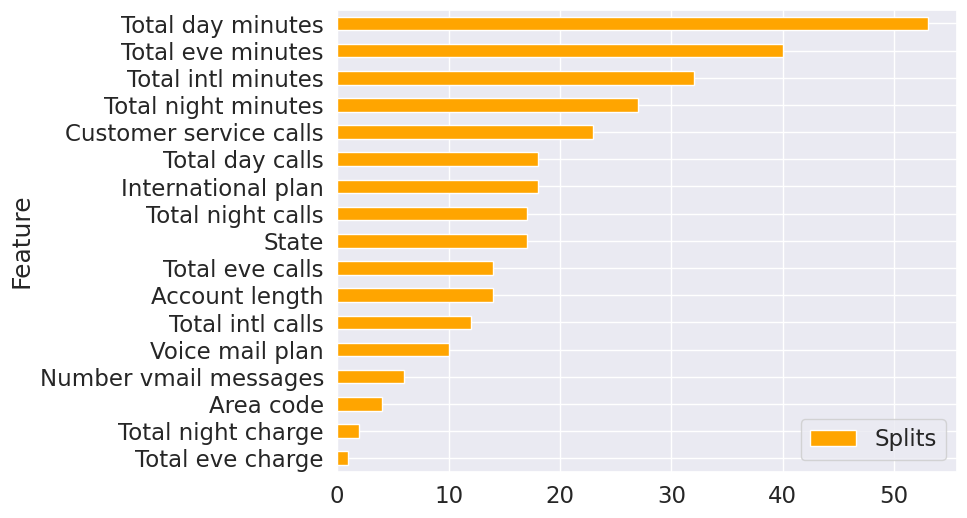

In [10]:
# create df
importance_df = pd.DataFrame(
    {"Splits": list(importances.values()), "Feature": list(importances.keys())}
)
importance_df.sort_values(by="Splits", inplace=True)
importance_df.plot(kind="barh", x="Feature", figsize=(8, 6), color="orange");